# 1.0 Flower Classification

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras

## 1.1 Download data

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [19]:
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


## 1.2 Explore the dataset
**Directories Structure**
```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [48]:
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))

In [55]:
print("Total: ", image_count)
print("---------------")
print("Daisy:", len(daisy))
print("Dandelion:", len(dandelion))
print("Roses:", len(roses))
print("Sunflowers:", len(sunflowers))
print("Tulips:", len(tulips))

Total:  3670
---------------
Daisy: 633
Dandelion: 898
Roses: 641
Sunflowers: 699
Tulips: 799


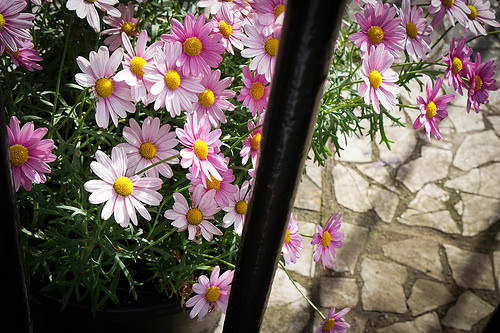

In [56]:
PIL.Image.open(str(daisy[0]))

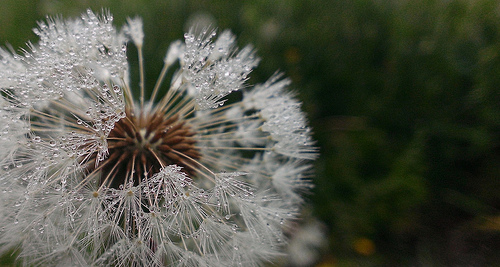

In [57]:
PIL.Image.open(str(dandelion[0]))

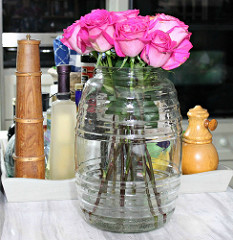

In [58]:
PIL.Image.open(str(roses[0]))

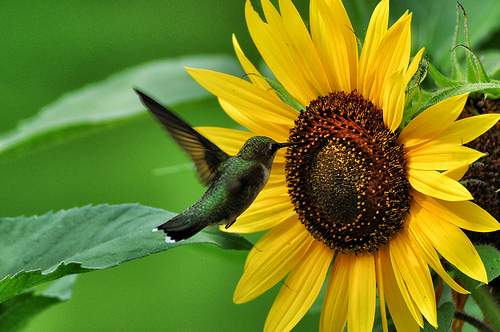

In [59]:
PIL.Image.open(str(sunflowers[0]))

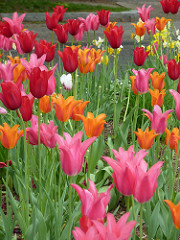

In [60]:
PIL.Image.open(str(tulips[0]))

### 1.2.1 Define dataset from directory

In [79]:
train_images = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

test_images.class_names

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [78]:
test_images = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

test_images.class_names

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### 1.2.2 Visualize data

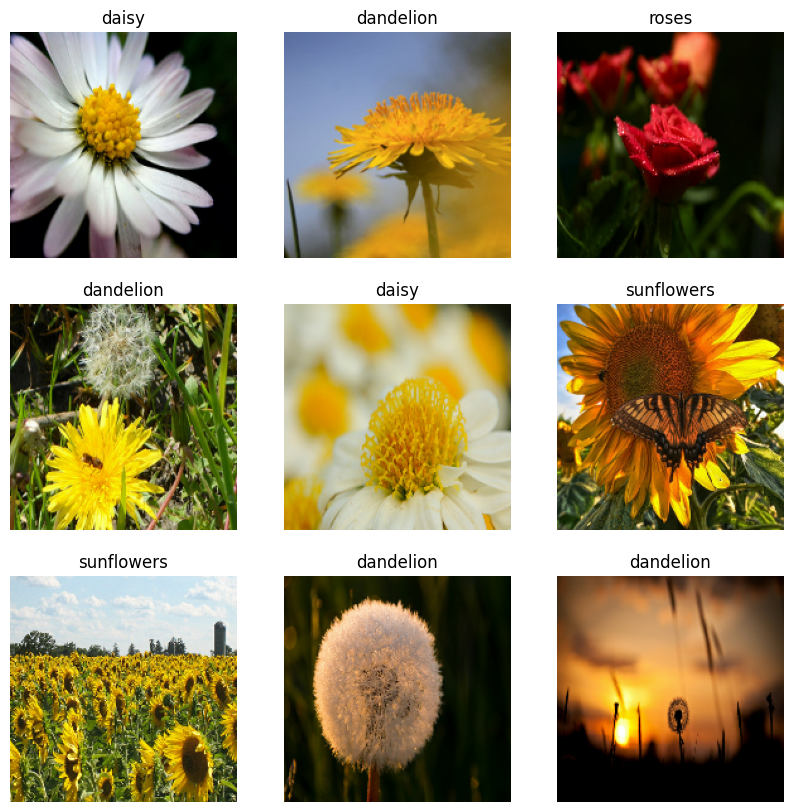

In [83]:
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_images.class_names[labels[i]])
        plt.axis("off")


In [97]:
train_images.class_names[labels[2]]

'roses'

In [98]:
for i, l in train_images.take(1):
    print(i.shape)
    print(l.shape)

(32, 180, 180, 3)
(32,)


In [99]:
train_images.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [103]:
train_images

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [102]:
for image_batch, labels_batch in train_images:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


### 1.2.3 Data `preprocess`